In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from poison_datasets import AdversarialPoison

/vulcanscratch/psando/miniconda3/envs/trainingadv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
cifar100_root = '/fs/vulcan-datasets/CIFAR'
cifar100_clean = datasets.CIFAR100(cifar100_root, train=True, download=False, transform=transforms.ToTensor())
cifar100_poison_root = '/fs/nexus-scratch/psando/psando_poisons/paper/cifar100/l2/ar-cifar-100'
cifar100_poison = AdversarialPoison(root=cifar100_poison_root, baseset=cifar100_clean)

dataloader_clean = torch.utils.data.DataLoader(cifar100_clean, batch_size=128, shuffle=False)
dataloader_poison = torch.utils.data.DataLoader(cifar100_poison, batch_size=128, shuffle=False)
print(f'Num images in clean dataset: {len(cifar100_clean)}')
print(f'Num images in poison dataset: {len(cifar100_poison)}')

Num images in clean dataset: 50000
Num images in poison dataset: 50000


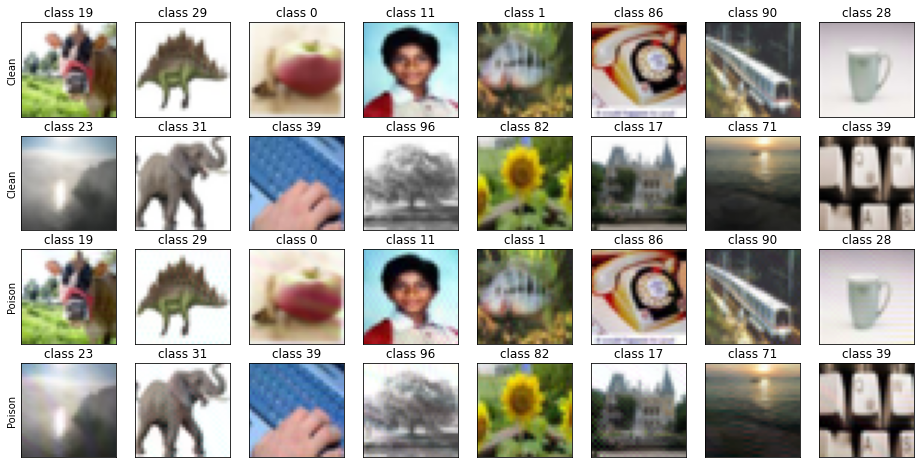

In [11]:
clean_x, clean_y = next(iter(dataloader_clean))
poison_x, poison_y = next(iter(dataloader_poison))

# Plot 4 x 8 grid of images where first two rows are clean and last two rows are poisoned
fig, ax = plt.subplots(4, 8, figsize=(16, 8), facecolor='w')
for i in range(4):
    for j in range(8):
        if i in [0,1] and j == 0:
            ax[i, j].set_ylabel('Clean')
        elif i in [2,3] and j == 0:
            ax[i, j].set_ylabel('Poison')
        if i in [0,1]:
            ax[i, j].imshow(clean_x[j + i*8].permute(1, 2, 0))
            ax[i, j].set_title(f'class {clean_y[j + i*8].item()}')
        else:
            ax[i, j].imshow(poison_x[j + (i-2)*8].permute(1, 2, 0))
            ax[i, j].set_title(f'class {poison_y[j + (i-2)*8].item()}')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.show()



In [15]:
# Compute perturbation (difference between poison and clean images from batch above)
# Batch of AR perturbations should have L2-norm of 1.0
diff = poison_x[:16] - clean_x[:16]
diff_norm = torch.norm(diff.view(diff.shape[0], -1), dim=1)
print(diff_norm)

tensor([0.9289, 0.7984, 0.9975, 0.9906, 1.0007, 0.9857, 0.9987, 0.9787, 1.0002,
        0.9194, 1.0009, 0.9337, 1.0036, 0.9497, 0.9993, 0.9885])


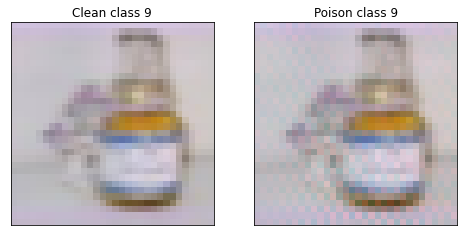

In [13]:
# Find index of first class 9 image in batch
class_9_idx = (clean_y == 9).nonzero(as_tuple=True)[0][0]
# Plot clean and poison image for class 9
fig, ax = plt.subplots(1, 2, figsize=(8, 4), facecolor='w')
ax[0].imshow(clean_x[class_9_idx].permute(1, 2, 0))
ax[0].set_title(f'Clean class 9')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(poison_x[class_9_idx].permute(1, 2, 0))
ax[1].set_title(f'Poison class 9')
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.show()
